#📌 Extracción

In [1]:
import json #Para procesar los archivos .json
import os
import pandas as pd
import numpy as np
import requests

In [2]:
url = "https://raw.githubusercontent.com/mateo16dev/Challenge-Telecom-X---Alura/refs/heads/main/Archivos%20Analisis/TelecomX_Data.json" #Ruta para el archivo Data
df = pd.read_json(url) #Transformandolo en un data frame de pandas

In [3]:
print(df.head()) #Visulizar el contendio del dataframe

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [4]:
url_dicc = "https://raw.githubusercontent.com/mateo16dev/Challenge-Telecom-X---Alura/refs/heads/main/Archivos%20Analisis/TelecomX_diccionario.md"
response = requests.get(url_dicc)

if response.status_code == 200:
    diccionario = response.text
    print(diccionario)
else:
    print("Error al descargar el diccionario:", response.status_code)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: t

#🔧 Transformación

##Conoce el conjunto de datos

In [5]:
# Extraer columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Combinar con las columnas principales
df_normalized = pd.concat([df.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                     customer_df, phone_df, internet_df, account_df], axis=1)

print(df_normalized.dtypes)
print(df_normalized.head())

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object
   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female      

##Comprobación de incoherencias en los datos

In [6]:
df_normalized['Charges.Total'] = pd.to_numeric(df_normalized['Charges.Total'], errors='coerce')
print(df_normalized.isnull().sum())
print(df_normalized.describe(include='all'))

customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64
        customerID Churn gender  SeniorCitizen Partner Dependents  \
count         7267  7267   7267    7267.000000    7267       7267   
unique        7267     3      2            NaN       2          2   
top     9995-HOTOH    No   Male            NaN      No         No   
freq             1  5174   3675            NaN    3749       5086   
mean           NaN   NaN    NaN       0.162653     NaN        NaN   
std            NaN   NaN    NaN       0.369074     NaN        NaN   
min            NaN   

##Comprobar valores nulos

In [7]:
# --- 3. Chequear valores nulos ---
print(customer_df.isna().sum())
print(phone_df.isna().sum())
print(internet_df.isna().sum())
print(account_df.isna().sum())


gender           0
SeniorCitizen    0
Partner          0
Dependents       0
tenure           0
dtype: int64
PhoneService     0
MultipleLines    0
dtype: int64
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [8]:
customer_df.info()
phone_df.info()
internet_df.info()
account_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   

In [9]:
account_df["Charges.Total"] = pd.to_numeric(account_df["Charges.Total"], errors="coerce")
account_df["Charges.Total"].isna().sum()


np.int64(11)

In [10]:
# Reemplazar NaN por 0
account_df["Charges.Total"].fillna(0, inplace=True)

# Verificar
account_df["Charges.Total"].isna().sum()


/tmp/ipython-input-1149124788.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  account_df["Charges.Total"].fillna(0, inplace=True)


np.int64(0)

## Fusión de los Dataframe

In [15]:
# Agregar 'customerID' a cada dataframe
customer_df['customerID'] = df['customerID']
account_df['customerID'] = df['customerID']
phone_df['customerID'] = df['customerID']
internet_df['customerID'] = df['customerID']

# combinación de dataframes
df = customer_df.merge(account_df, on="customerID", how="left")
df = df.merge(phone_df, on="customerID", how="left")
df = df.merge(internet_df, on="customerID", how="left")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7267 non-null   object 
 1   SeniorCitizen     7267 non-null   int64  
 2   Partner           7267 non-null   object 
 3   Dependents        7267 non-null   object 
 4   tenure            7267 non-null   int64  
 5   customerID        7267 non-null   object 
 6   Contract          7267 non-null   object 
 7   PaperlessBilling  7267 non-null   object 
 8   PaymentMethod     7267 non-null   object 
 9   Charges.Monthly   7267 non-null   float64
 10  Charges.Total     7267 non-null   float64
 11  PhoneService      7267 non-null   object 
 12  MultipleLines     7267 non-null   object 
 13  InternetService   7267 non-null   object 
 14  OnlineSecurity    7267 non-null   object 
 15  OnlineBackup      7267 non-null   object 
 16  DeviceProtection  7267 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,customerID,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Female,0,Yes,Yes,9,0002-ORFBO,One year,Yes,Mailed check,65.6,593.30,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,Male,0,No,No,9,0003-MKNFE,Month-to-month,No,Mailed check,59.9,542.40,Yes,Yes,DSL,No,No,No,No,No,Yes
2,Male,0,No,No,4,0004-TLHLJ,Month-to-month,Yes,Electronic check,73.9,280.85,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,Male,1,Yes,No,13,0011-IGKFF,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Female,1,Yes,No,3,0013-EXCHZ,Month-to-month,Yes,Mailed check,83.9,267.40,Yes,No,Fiber optic,No,No,No,Yes,Yes,No


## Creación columna de cuentas diarias

In [16]:
# Crear columna de cuenta diaria
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30

# Revisar resultado
df[["Charges.Monthly", "Cuentas_Diarias"]].head()


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


#📊 Carga y análisis

## Estadísticas de variables numéricas

In [17]:
# Seleccionamos las columnas numéricas
num_cols = ["tenure", "SeniorCitizen", "Charges.Monthly", "Charges.Total", "Cuentas_Diarias"]

# Resumen estadístico básico
desc_num = df[num_cols].describe().T  # Transpuesta para mejor visualización

# Agregar mediana y rango
desc_num["median"] = df[num_cols].median()
desc_num["range"] = desc_num["max"] - desc_num["min"]

# Redondear para mejor lectura
desc_num = desc_num.round(2)

desc_num


,count,mean,std,min,25%,50%,75%,max,median,range
tenure,7267.0,32.35,24.57,0.00,9.00,29.00,55.00,72.00,29.00,72.00
SeniorCitizen,7267.0,0.16,0.37,0.00,0.00,0.00,0.00,1.00,0.00,1.00
Charges.Monthly,7267.0,64.72,30.13,18.25,35.42,70.30,89.88,118.75,70.30,100.50
Charges.Total,7267.0,2277.18,2268.65,0.00,396.20,1389.20,3778.52,8684.80,1389.20,8684.80
Cuentas_Diarias,7267.0,2.16,1.00,0.61,1.18,2.34,3.00,3.96,2.34,3.35


## Variables categóricas

In [18]:
cat_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
            "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
            "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
            "PaperlessBilling", "PaymentMethod"]

for col in cat_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).round(2))  # proporciones
    print("\n")


--- gender ---
gender
Male      3675
Female    3592
Name: count, dtype: int64
gender
Male      0.51
Female    0.49
Name: proportion, dtype: float64


--- Partner ---
Partner
No     3749
Yes    3518
Name: count, dtype: int64
Partner
No     0.52
Yes    0.48
Name: proportion, dtype: float64


--- Dependents ---
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
Dependents
No     0.7
Yes    0.3
Name: proportion, dtype: float64


--- PhoneService ---
PhoneService
Yes    6560
No      707
Name: count, dtype: int64
PhoneService
Yes    0.9
No     0.1
Name: proportion, dtype: float64


--- MultipleLines ---
MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64
MultipleLines
No                  0.48
Yes                 0.42
No phone service    0.10
Name: proportion, dtype: float64


--- InternetService ---
InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64
InternetService
Fibe

## Distribución de la variable Churn (evasión)

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


/tmp/ipython-input-973576898.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")


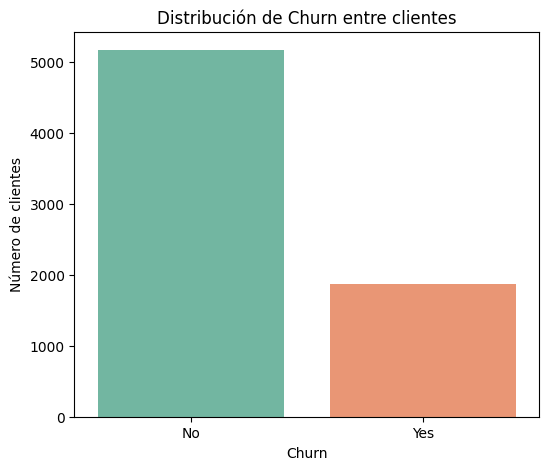

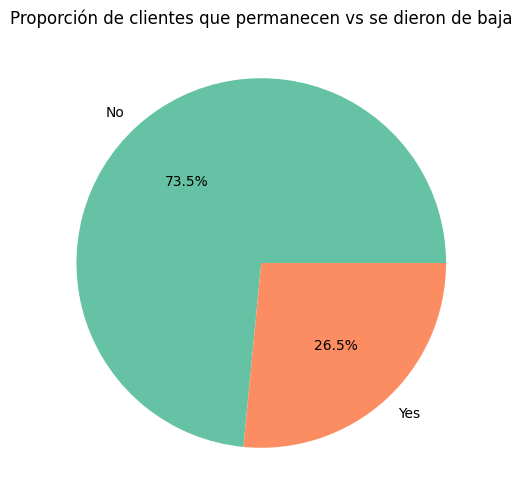

In [21]:
import matplotlib.pyplot as plt # biblioteca para vizualización de los datos
import seaborn as sns #Gráficos

# Agrega la columna 'Churn' de nuevo al dataframe df
df['Churn'] = df_normalized['Churn']

# Remove rows where 'Churn' is an empty string
df = df[df['Churn'] != '']

# --- Conteo de clientes por Churn ---
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print(churn_counts)
print(churn_percent.round(2))

# --- Gráfico de barras ---
plt.figure(figsize=(6,5))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="Set2")
plt.title("Distribución de Churn entre clientes")
plt.ylabel("Número de clientes")
plt.xlabel("Churn")
plt.show()

# --- Pie chart opcional ---
plt.figure(figsize=(6,6))
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=["#66c2a5","#fc8d62"])
plt.title("Proporción de clientes que permanecen vs se dieron de baja")
plt.show()

#📄Informe final